In [1]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np

from src.data_processing import get_data,prepare_data
from src.model import CustomModel
from src.train import train_model
from src.evaluate import evaluate_model
from src.utils import graph_generator

In [2]:
df = get_data("dataset/GBPUSD_H4_data.csv")

         Open     High      Low    Close Volume  Label
0     1.39152  1.39503  1.38894  1.39455  18255      1
1     1.39454  1.39564  1.39306  1.39539   4453      1
2     1.39542  1.39764  1.39393   1.3944   6266      1
3     1.39442  1.39696   1.3942  1.39624  13054      1
4     1.39624  1.39672  1.39317  1.39484  16614      1
...       ...      ...      ...      ...    ...    ...
4995  1.27997  1.28211  1.27773   1.2784  25359      2
4996  1.27841  1.27902  1.27781  1.27897  14310      2
4997  1.27897    1.279  1.27829  1.27879   3831      2
4998   1.2788  1.27944  1.27839  1.27921  10052      2
4999  1.27922  1.27962  1.27882    1.279   4874      2

[5000 rows x 6 columns]


In [3]:
# Prepare data for training
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
prediction_length = 3
time_step = 50

X_train, X_val, X_test, y_train, y_val, y_test = prepare_data(df, device, time_step, prediction_length)

In [4]:
input_size = X_train.shape[2]
hidden_size = 64
output_size = 3
num_layers = 1
learning_rate = 0.001

# Define model, criterion, and optimizer
model = CustomModel(input_size, hidden_size, output_size, num_layers,prediction_length)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [5]:
num_epochs = 100

# Train the model
best_model_state,val_loss_data,train_loss_data,learning_rates = train_model(model, X_train, y_train, X_val, y_val, criterion, optimizer, num_epochs, device)

Epoch [10/100], Loss: 3.2735, Validation Loss: 3.2955, Validation Accuracy: 36.50%
Epoch [20/100], Loss: 3.2618, Validation Loss: 3.3078, Validation Accuracy: 36.63%
Epoch [30/100], Loss: 3.2515, Validation Loss: 3.2884, Validation Accuracy: 37.51%
Epoch [40/100], Loss: 3.2318, Validation Loss: 3.2957, Validation Accuracy: 38.18%
Epoch [50/100], Loss: 3.1625, Validation Loss: 3.2891, Validation Accuracy: 37.44%
Epoch [60/100], Loss: 3.1367, Validation Loss: 3.2342, Validation Accuracy: 40.00%
Epoch [70/100], Loss: 3.1017, Validation Loss: 3.1852, Validation Accuracy: 40.54%
Epoch [80/100], Loss: 3.0762, Validation Loss: 3.1713, Validation Accuracy: 41.89%
Epoch [90/100], Loss: 3.0550, Validation Loss: 3.1414, Validation Accuracy: 43.64%
Epoch [100/100], Loss: 3.0275, Validation Loss: 3.1062, Validation Accuracy: 42.69%


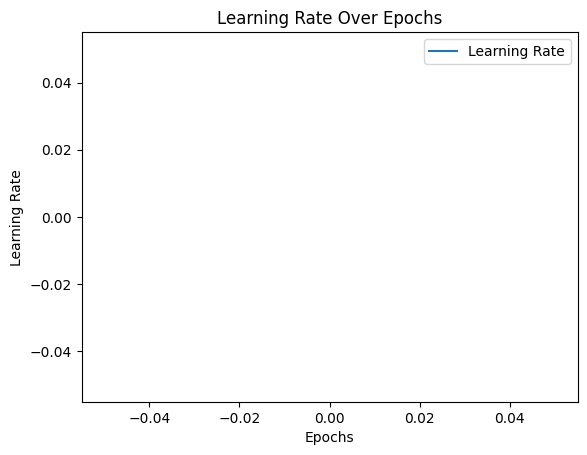

In [6]:
graph_generator(val_loss_data,train_loss_data,learning_rates)

In [7]:
model.load_state_dict(best_model_state)
model_save_path = 'model/model.pth'

torch.save(model.state_dict(), model_save_path)

In [8]:
evaluate_model(model, X_test, y_test, criterion, [0,1,2], device)

Test Loss: 3.0119, Test Accuracy: 49.26%


TypeError: object of type 'int' has no len()